In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale # for scaling the data
import sklearn.metrics as sm # for evaluating the model
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize

In [16]:
# choosing iris data from Sklearn
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [23]:
#removing target variable
df_indep = df.loc[:, ~df.columns.isin(['target'])]
df_dep = df.loc[: , df.columns.isin(['target'])]

In [104]:
X = df_indep.values
Y = df_dep.values

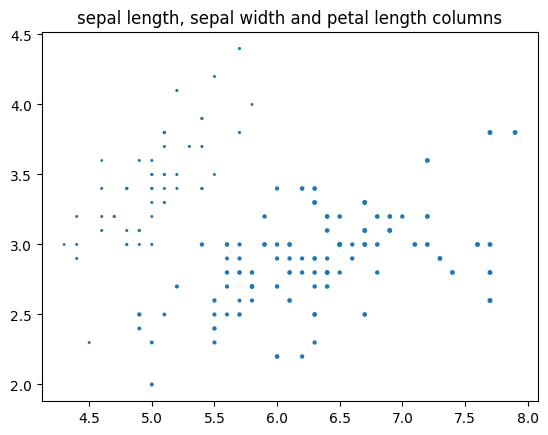

In [125]:
plt.title("sepal length, sepal width and petal length columns")
plt.scatter(X[:, 0], X[:, 1], X[:,2])
plt.show()

### Applying K=2

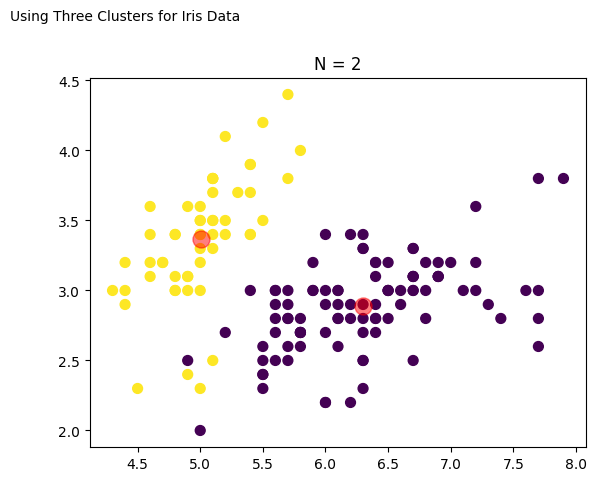

In [106]:
k_2 = KMeans(n_clusters=2, random_state=5)
k_2.fit(X)
y_2 = k_2.predict(X)
plt.title("N = 2")
plt.figtext(s="Using Three Clusters for Iris Data",x=0,y=1)
plt.scatter(X[:, 0], X[:, 1], c=y_2, s=50)
centers = k_2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, alpha=0.5);

### Applying K=3

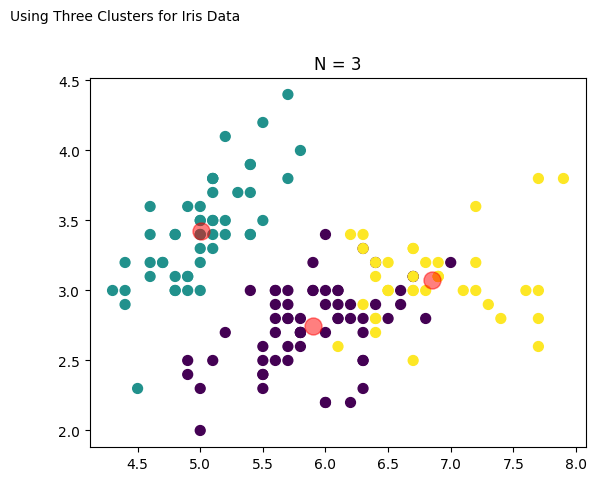

In [107]:
k_3 = KMeans(n_clusters=3, random_state=5)
k_3.fit(X)
y_3 = k_3.predict(X)
plt.title("N = 3")
plt.figtext(s="Using Three Clusters for Iris Data",x=0,y=1)
plt.scatter(X[:, 0], X[:, 1], c=y_3, s=50)
centers = k_3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, alpha=0.5);

### Applying K=5

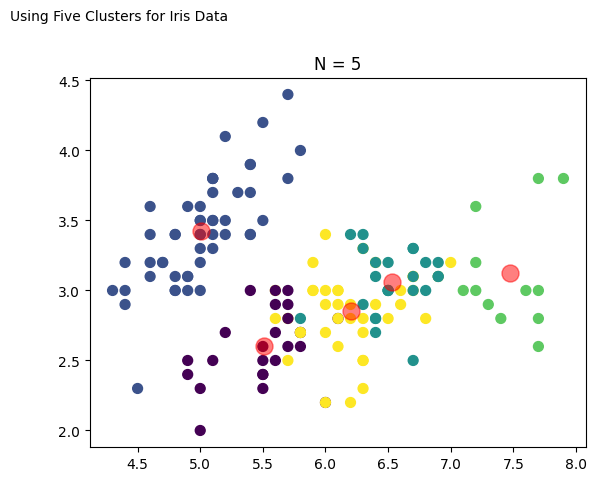

In [122]:
k_5 = KMeans(n_clusters=5, random_state=5)
k_5.fit(X)
y_5 = k_5.predict(X)
plt.title("N = 5")
plt.figtext(s="Using Five Clusters for Iris Data",x=0,y=1)
plt.scatter(X[:, 0], X[:, 1], c=y_5, s=50)
centers = k_5.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, alpha=0.5);

### Applying K = 7

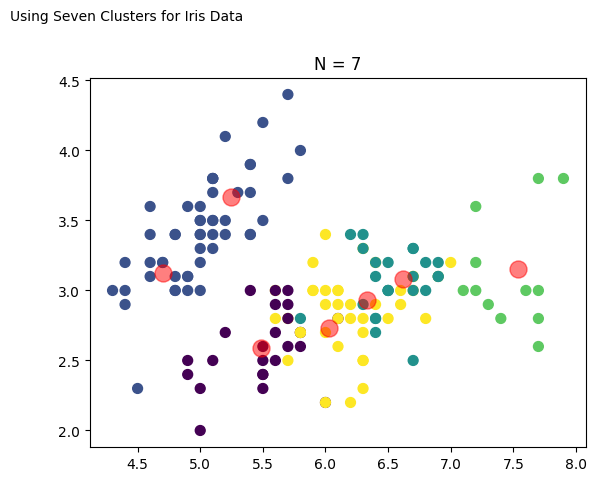

In [109]:
k_7 = KMeans(n_clusters=7, random_state=5)
k_7.fit(X)
y_7 = k_5.predict(X)
plt.title("N = 7")
plt.figtext(s="Using Seven Clusters for Iris Data",x=0,y=1)
plt.scatter(X[:, 0], X[:, 1], c=y_7, s=50)
centers = k_7.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, alpha=0.5);

### Metrics for different K

In [110]:
print(f"Accuracy for K=2 {accuracy_score(Y, y_2)}")
print(f"Accuracy for K=3 {accuracy_score(Y, y_3)}")
print(f"Accuracy for K=5 {accuracy_score(Y, y_5)}")
print(f"Accuracy for K=7 {accuracy_score(Y, y_7)}")

Accuracy for K=2 0.02
Accuracy for K=3 0.24
Accuracy for K=5 0.16
Accuracy for K=7 0.16


In [114]:
print(f"Confusion matrix for K=2 \n {confusion_matrix(Y, y_2)}")
print(f"Confusion matrix for K=3 \n {confusion_matrix(Y, y_3)}")
print(f"Confusion matrix for K=5 \n {confusion_matrix(Y, y_5)}")
print(f"Confusion matrix for K=7 \n {confusion_matrix(Y, y_7)}")

Confusion matrix for K=2 
 [[ 0 50  0]
 [47  3  0]
 [50  0  0]]
Confusion matrix for K=3 
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
Confusion matrix for K=5 
 [[ 0 50  0  0  0]
 [24  0  0  0 26]
 [ 1  0 24 12 13]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
Confusion matrix for K=7 
 [[ 0 50  0  0  0]
 [24  0  0  0 26]
 [ 1  0 24 12 13]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


### Conclusion

We chose Iris data set to practice K-means clustering and used 2,3,5 and 7 clusters. Increasing the numbeer of clusters up to some point will increase your accuracy, however after an optimum point increasing number of clusters would not help. This optimum point can often be determined by k-elbow method. we can see that in this case, since we have 3 types of targets the three clusters give us highest accuracy.